In [5]:
import requests
import pandas as pd
import geopandas as gpd
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [4]:
import s3fs

fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})

MY_BUCKET = "anhlinh"
fs.ls(MY_BUCKET)

['anhlinh/diffusion']

In [6]:
MY_BUCKET = "anhlinh"
FILE_PATH_S3 = f"{MY_BUCKET}/diffusion/df_indicateurs_dep.csv"

# Import
with fs.open(FILE_PATH_S3, "r") as file_in:
    df_indicateurs_dep = pd.read_csv(file_in)

# Vérification
df_indicateurs_dep.head()

,Unnamed: 0,Date,Département,Indicateur,Nombre,Population,Géométrie,Taux (/10 000),Année,Mois
0,0,1996-01-01,01,Homicides,0.0,499310,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...",0.000000,1996,1
1,1,1996-01-01,02,Homicides,1.0,538017,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ...",0.018587,1996,1
2,2,1996-01-01,03,Homicides,0.0,349376,"POLYGON ((3.03207 46.79491, 3.03424 46.7908, 3...",0.000000,1996,1
3,3,1996-01-01,04,Homicides,0.0,137453,"POLYGON ((5.67604 44.19143, 5.67817 44.19051, ...",0.000000,1996,1
4,4,1996-01-01,05,Homicides,0.0,118526,"POLYGON ((6.26057 45.12685, 6.26417 45.12641, ...",0.000000,1996,1


In [7]:
MY_BUCKET = "anhlinh"
FILE_PATH_S3 = f"{MY_BUCKET}/diffusion/df_indicateurs_nat.csv"

# Import
with fs.open(FILE_PATH_S3, "r") as file_in:
    df_indicateurs_nat = pd.read_csv(file_in)

# Vérification
df_indicateurs_nat.head()

,Unnamed: 0,Date,Zone,Indicateur,Nombre,Population,Taux (/10 000)
0,1,1996-01-01,France_Métro,Homicides,115.0,57936,0.019849
1,3,1996-02-01,France_Métro,Homicides,108.0,57943,0.018639
2,5,1996-03-01,France_Métro,Homicides,128.0,57951,0.022088
3,7,1996-04-01,France_Métro,Homicides,119.0,57963,0.020530
4,9,1996-05-01,France_Métro,Homicides,112.0,57976,0.019318


In [12]:
from visualisation import tracer_evolution_taux
from visualisation import charte_graphique

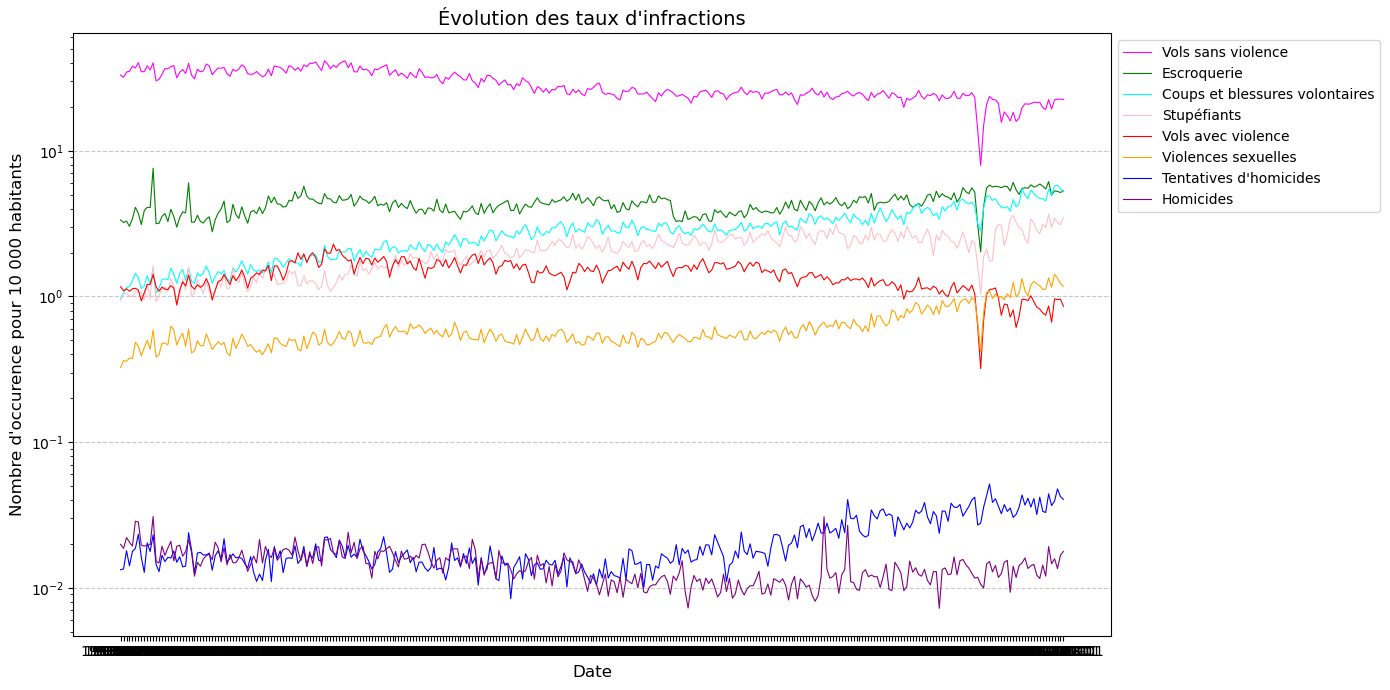

In [15]:
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux (/10 000)", use_log_scale = True)